#  2 i) Linear regression
Note: Restart the kernel and start to run!

In [127]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
import sklearn
import csv

In [128]:
f=100
n=10000
#X is 1000*100 matrix, y is 1*1000 mat
X, y, coef = sklearn.datasets.make_regression(n_samples = n, n_informative=10, noise=0,coef = True)

filename = 'A2Q2Data_train.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
X_temp = data
coef.shape

(100,)

In [129]:

X = np.delete(X_temp, 100,1)
y = X_temp[:,100]

y.reshape(10000,1)

#print(y[:,None])
y = y[:,None]
print(y.shape)
print(y)


(10000, 1)
[[1.9741]
 [2.3354]
 [2.2053]
 ...
 [2.0964]
 [1.8405]
 [2.7624]]


In [130]:
print(coef)
coef.shape

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         39.63037741 93.88061104  0.          0.          0.
  0.          0.          0.          0.          0.         13.52347686
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         98.30045316  0.          0.         69.01130232  0.
 86.16346954  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         98.1764087   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         49.29482275  0.         23.56643842
  0.          0.          0.          0.          0.          0.
  0.     

(100,)

In [131]:
#take only the training data set:

#n_train = 0.8 * 0.8 * 1000
#n_test = 0.2*n
#n_val = 0.2 * 0.8 *1000
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


#X_train.shape



X_train = X
y_train = y

save_X_train = X_train
save_y_train = y_train



# Only ridge regresion will use x_tval and y_val
#n_val = 0.2 * 10000
X_train_ridge, X_val, y_train_ridge, y_val = train_test_split(X_train, y_train, test_size = 0.2)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_val", X_val.shape)
print("y_val", y_val.shape)


X_train (10000, 100)
y_train (10000, 1)
X_val (2000, 100)
y_val (2000, 1)


In [132]:
f_test=100
n_test=500
n_train=10000
#X is 1000*100 matrix, y is 1*1000 mat
X, y, coef = sklearn.datasets.make_regression(n_samples = n_test, n_informative=10, noise=0,coef = True)

filename = 'A2Q2Data_test.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
X_temp = data
coef.shape
print(X_temp.shape)

# shuffle if needed only. To try different radom initialization
#print(X_temp)
#np.random.shuffle(X_temp)
#print("==============================================")
#print(X_temp)

X_testing = np.delete(X_temp, 100,1)
y_testing = X_temp[:,100]

y_testing.reshape(500,1)

#print(y[:,None])
y_testing = y_testing[:,None]

(500, 101)


In [133]:
X_test = X_testing
y_test = y_testing

In [134]:
#Obtaining analytical solution (X^TX)^-1X^Ty
#w_ml = LA.inv(X.T @ X) @X.T @y
w_ml = np.dot(np.dot(LA.inv(np.dot(X_train.T, X_train)),X_train.T), y_train)

In [135]:
#loss on train set using w_ML
#print("w_ml", w_ml.reshape(f))
print()
print("mean squared error on train set using w_ML", (1/n_train)*(LA.norm(X_train@w_ml-y_train))**2)


mean squared error on train set using w_ML 0.03968644186272517


In [136]:
#Mean squared Error on the test set using w_ML
print("mean squared error on test set using w_ML", (1/n_test)*(LA.norm(X_test@w_ml - y_test))**2)

mean squared error on test set using w_ML 0.37072731116978636


In [137]:
w_ml.reshape(-1)

array([-7.84961009e-03, -1.36715320e-02, -3.61656438e-03,  2.64909160e-03,
        1.88551446e-01,  2.65314657e-03,  9.46531786e-03,  1.79809481e-01,
        3.73757317e-03,  4.99608944e-01,  8.35836265e-03,  4.29108775e-03,
        1.42141179e-02,  3.94232414e-03,  9.36795890e-03, -1.12038274e-03,
        3.35727500e-03,  1.16152212e-03, -9.40884707e-03, -2.45575476e-03,
       -1.17409629e-02, -1.01960612e-02,  7.95771321e-03, -1.00574854e-02,
        6.04882939e-03, -4.67345192e-03, -3.09091547e-03,  8.14909193e-03,
        1.20264599e-02, -6.82458163e-03, -8.65405539e-03,  9.86273479e-04,
        4.92968011e-03,  5.99772461e-03, -1.34667860e-02,  1.07075729e-03,
        1.32745992e-02, -1.14148742e-02, -2.01056697e-02,  5.85096240e-01,
        4.94483247e-04, -7.86666920e-04, -2.71926574e-03, -9.54021938e-03,
       -5.44161058e-03,  9.80679209e-03, -6.72540624e-03, -4.45414276e-04,
        6.98516508e-03,  3.16138907e-02,  4.51763485e-01, -8.75221380e-03,
        2.55167390e-03,  

# 2 ii) Gradient descent

In [138]:
eta = 69e-7

w_grad = np.random.randn(f,1)
print("w_grad", w_grad.shape)
loss1 = []
diff = []

for i in range(1100):
    xyz = X_train@w_grad
    w_grad = w_grad-eta*(X_train.T@(X_train@w_grad-y_train)) 
    diff.append(LA.norm(w_grad-w_ml))

diff = np.array(diff)


w_grad (100, 1)


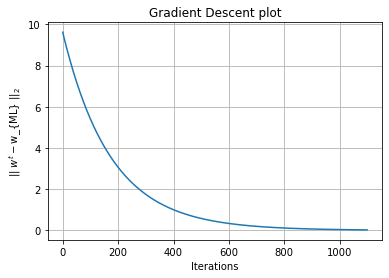

In [139]:
# plot ||w_grad-w_ml||_2
plt.grid()
plt.title("Gradient Descent plot")
plt.xlabel("Iterations")
plt.ylabel("|| $w^t - $w_{ML} ||$_2$")
plt.plot(diff)
plt.show()
#plt.savefig("L2 Norm of difference for gradient descent")

In [140]:
# Final mean squared Error on train set using w_ML
#print("Final Mean squared error on train set using w_grad", (1/n_train)*(LA.norm(X_train@w_grad-y_train))**2)


In [141]:
# Final mean squared Error on test set using w_grad
print(y_test.shape)
print("Final Mean squared error on train set using w_grad", (1/n_test)*(LA.norm(X_test@w_grad-y_test))**2)

(500, 1)
Final Mean squared error on train set using w_grad 0.3686522024385483


In [142]:
#w_grad.reshape(-1)

# 2) iii) Stochastic Gradient descent

In [143]:
X_train_1 = np.empty((0,100),int)
y_train_1 = np.empty((0,100),int)

X_train = save_X_train
y_train = save_y_train


for i in range(100):
    X_train_1 = np.append(X_train_1, np.mean(X_train[i*100:(i+1)*100] , axis = 0))
    y_train_1 = np.append(y_train_1, np.mean(y_train[i*100:(i+1)*100] , axis = 0))

In [144]:
eta = 69e-7

w_grad = np.random.randn(f,1)
print("w_grad", w_grad.shape)
loss1 = []
diff = []

for i in range(100):
    xyz = X_train@w_grad
    w_grad = w_grad-eta*(X_train[i*100:(i+1)*100].T@(X_train[0:100]@w_grad-y_train[i*100:(i+1)*100])) 
    diff.append(LA.norm(w_grad-w_ml))

diff = np.array(diff)

w_grad (100, 1)


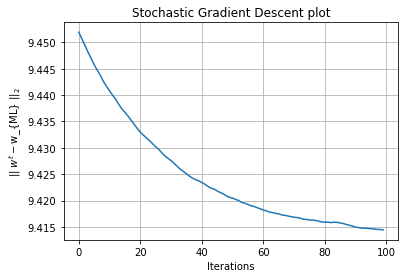

<Figure size 432x288 with 0 Axes>

In [145]:
# plot ||w_grad-w_ml||_2
plt.grid()
plt.title("Stochastic Gradient Descent plot")
plt.xlabel("Iterations")
plt.ylabel("|| $w^t - $w_{ML} ||$_2$")
plt.plot(diff)
plt.show()
plt.savefig("L2 Norm of difference for gradient descent")

In [146]:
# Final mean squared Error on train set using w_ML
print("Final Mean squared error on train set using w_grad", (1/n_train)*(LA.norm(X_train@w_grad-y_train))**2)


Final Mean squared error on train set using w_grad 8.14208871584013


In [147]:
# Final mean squared Error on test set using w_grad
print(y_test.shape)
#print(y_test)
print("Final Mean squared error on train set using w_grad", (1/n_test)*(LA.norm(X_test@w_grad-y_test))**2)

(500, 1)
Final Mean squared error on train set using w_grad 8.212066431030644


# 2 iv) Ridge Regression

In [148]:
n_val_ridge = 10000*0.2
lam_min = 0
#initializing parameters
a, b = 6, 8
#eta = 70e-7
eta = 70e-7
diff = []
loss = []
n_iter = 1
iden = np.eye(f,f)
w_space = []

#lambda search space
lambdas = np.array(np.arange(0.7, 0.8, 0.1))
#lambdas = np.array(np.arange(15, 17, 0.1))
#lambdas = np.array(np.arange(3.1, 3.4, 0.1))
w_ridge = np.random.randn(f,1)

X_train = X_train_ridge
y_train = y_train_ridge

XTX_train = X_train.T@X_train
XTy_train = X_train.T@y_train

for lam in lambdas:
    w_ridgetemp = np.random.beta(a,b,(f,1))
    for i in range(n_iter):
        w_ridgetemp = w_ridgetemp - eta * (np.matmul(XTX_train+ lam *iden, w_ridgetemp) - XTy_train)
    
    loss.append((1/n_val_ridge)* (LA.norm(X_val@w_ridgetemp-y_val))**2)
    
    if(LA.norm(X_val@w_ridgetemp - y_val) < LA.norm(X_val@w_ridge-y_val)):
        w_ridge = np.copy(w_ridgetemp)
        lam_min = lam
        
loss = np.array(loss)
print()
print("Lambda for which validation error is minimum", lam_min)


Lambda for which validation error is minimum 0


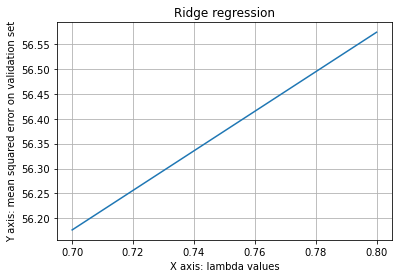

In [149]:
#plot loss on test vs lambda
plt.grid()
#plt.figure(figsize(12, 12))
plt.title("Ridge regression")
plt.xlabel("X axis: lambda values")
plt.ylabel("Y axis: mean squared error on validation set")
plt.plot(lambdas, loss)
#plt.sacefig("Loss on validation set Vs lambda")
#plt.show()

In [150]:
#mean squared error on train set using w_ridge

print("mean squared error on train set using w_ridge", (1/n_train)*(LA.norm(X_train@w_ridge-y_train))**2)

mean squared error on train set using w_ridge 24.52245270157425


In [151]:
#mean squared error on test set using w_ridge

print("mean squared error on test set using w_ridge", (1/n_test)*(LA.norm(X_test@w_ridge-y_test))**2)

mean squared error on test set using w_ridge 27.306944914091773
